In [7]:
import cv2
import numpy as np
import glob
import random
from matplotlib import pyplot as plt


In [8]:
# !pwd
# ../data/sheet_images/

In [9]:

# Load images
def load_images_from_folder(folder):
    images = []
    for filename in glob.glob(f'{folder}/*.png'):
        img = cv2.imread(filename)
        if img is not None:
            images.append(img)
    return images


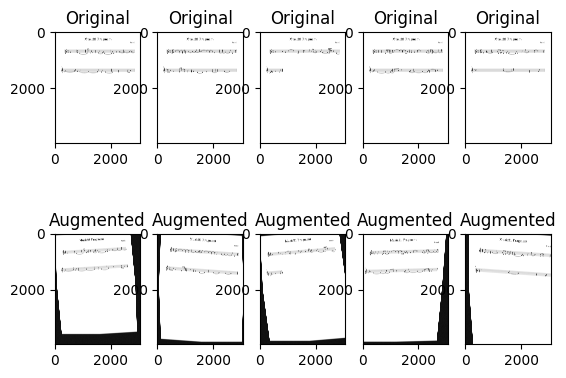

In [17]:

# Grayscale conversion
def convert_to_grayscale(images):
    grayscale_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(gray)
    return grayscale_images

# Noise reduction
def reduce_noise(images):
    denoised_images = []
    for img in images:
        denoised = cv2.GaussianBlur(img, (5, 5), 0)
        denoised_images.append(denoised)
    return denoised_images

# Binarization
def binarize_images(images):
    binary_images = []
    for img in images:
        _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        binary_images.append(binary)
    return binary_images

# Image augmentation
def augment_image(image):
    rows, cols = image.shape

    # Rotation
    angle = random.uniform(-5, 5)
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated = cv2.warpAffine(image, M, (cols, rows))

    # Scaling
    scale = random.uniform(0.9, 1.1)
    resized = cv2.resize(rotated, None, fx=scale, fy=scale)

    # Translation
    tx = random.randint(-5, 5)
    ty = random.randint(-5, 5)
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(resized, M, (cols, rows))

    # Shearing
    shear = random.uniform(-0.1, 0.1)
    M = np.float32([[1, shear, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(translated, M, (cols, rows))

    # Noise addition
    noise = np.random.randint(0, 50, (rows, cols), dtype='uint8')
    noisy = cv2.add(sheared, noise)

    # Blur
    blurred = cv2.GaussianBlur(noisy, (5, 5), 0)

    return blurred

def augment_images(images):
    augmented_images = []
    for img in images:
        augmented_images.append(augment_image(img))
    return augmented_images


# Load images
folder = '../data/sheet_images/'
images = load_images_from_folder(folder)

# Preprocess images
grayscale_images = convert_to_grayscale(images)
denoised_images = reduce_noise(grayscale_images)
binary_images = binarize_images(denoised_images)

# Augment images
augmented_images = augment_images(binary_images)


# Display original and augmented images for comparison
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(binary_images[i], cmap='gray')
    plt.title('Original')
    
    plt.subplot(2, 5, i+6)
    plt.imshow(augmented_images[i], cmap='gray')
    plt.title('Augmented')

plt.show()
